In [2]:
from numpy import sqrt, linspace, array, loadtxt, exp, pi
from scipy.integrate import quadrature, romberg
from scipy.interpolate import interp1d
from matplotlib import pyplot as pl


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

**DATA**

In [4]:
I=np.array([
    0.01596, 0.01586, 0.01576, 0.01554, 0.01495, 0.01459, 0.01423, 0.01407, 0.01328, 0.01299,
    0.01271, 0.01259, 0.01196, 0.01138, 0.01086, 0.01039, 0.00995, 0.00956, 0.00885, 0.00824,
    0.0077, 0.00724, 0.00682, 0.0053, 0.00435, 0.00367, 0.00318, 0.0028, 0.00251, 0.00227
])

V=np.array([
    11.9, 11.82, 11.75, 11.59, 11.16, 10.89, 10.63, 10.51, 9.93, 9.71,
    9.1, 9.42, 8.95, 8.53, 8.14, 7.79, 7.46, 7.17, 6.65, 6.19,
    5.79, 5.44, 5.13, 4, 3.28, 2.78, 2.41, 2.12, 1.91, 1.72
]) # VOLTS

**FUNCIONES**


In [5]:
import math

def desviacion_estandar(datos):
    # Calcular la media
    n = len(datos)
    media = sum(datos) / n
    
    # Calcular la suma de los cuadrados de las diferencias con la media
    suma_cuadrados = sum((x - media) ** 2 for x in datos)
    
    # Calcular la desviación estándar (para una muestra, usa n-1)
    desviacion = math.sqrt(suma_cuadrados / (n - 1))
    
    return desviacion

In [6]:
N=len(V)
PROM_I=sum(I)/N
print(f"El promedio de la corriente es: {PROM_I:.5f} [A]")

PROM_V=sum(V)/N
print(f"El promedio de el voltaje es: {PROM_V:.5f} [V]")

SIGMA_I = desviacion_estandar(I)
print(f"La desviación estándar de la corriente es: {SIGMA_I:.5f} [A]")

SIGMA_V = desviacion_estandar(V)
print(f"La desviación estándar del voltaje es: {SIGMA_V:.5f} [V]")

El promedio de la corriente es: 0.00999 [A]
El promedio de el voltaje es: 7.46233 [V]
La desviación estándar de la corriente es: 0.00451 [A]
La desviación estándar del voltaje es: 3.34451 [V]


In [7]:
# Función objetivo que se debe minimizar
def modelo(Rv):
    return np.sum((V - I * Rv)**2)

# Establecer un valor inicial para Rv
valor_inicial_Rv = 752.24  # Valor Resistencia dada por fabricante

# Utilizar minimize para encontrar Rv que minimice la función objetivo
resultado = optimize.minimize(modelo, valor_inicial_Rv)

# El valor de Rv que minimiza la función objetivo
Rv_min = resultado.x[0]

# Calcular el chi-cuadrado
chi2 = np.sum(((V - I * 752.24)**2) / (0.2**2))
chi2red=chi2/N

In [8]:
print("El valor de \u03C7\u00B2 es:", chi2)
print("El valor de R que minimiza \u03C7\u00B2  es:", Rv_min, "[Ω]")
print("El valor del \u03C7\u00B2 reducido es:", chi2red)

El valor de χ² es: 7.504212033887995
El valor de R que minimiza χ²  es: 746.3312524597117 [Ω]
El valor del χ² reducido es: 0.25014040112959984


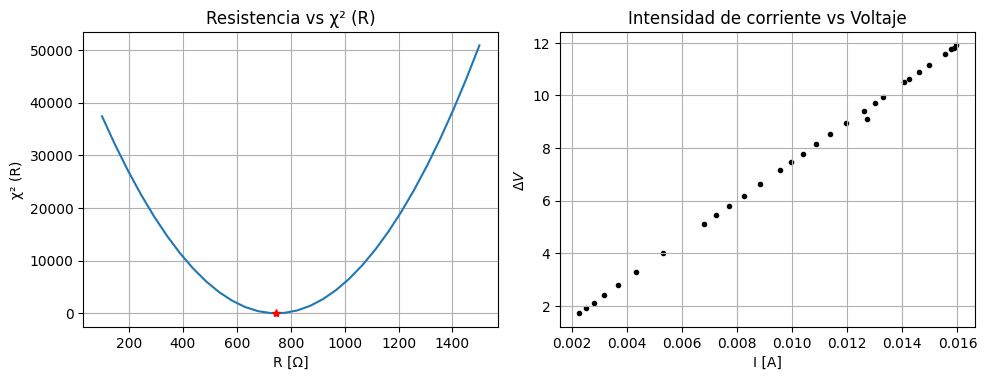

In [8]:
xi2=[]
Re_v=[]
V_t1=[]

for Rv in np.linspace(100,1500,30):
    chi22 = np.sum(((V - I *Rv)**2) / (0.2**2))
    xi2.append(chi22)
    Re_v.append(Rv) 

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.plot(Re_v,xi2,Rv_min,0, '*r')
#plt.plot(Rv_min,0, '*g')
plt.grid(True)
plt.xlabel("R [\u03A9]")
plt.ylabel("\u03C7\u00B2 (R)")
plt.title("Resistencia vs \u03C7\u00B2 (R)")
#plt.figure(figsize=(5,3))
plt.subplot(2,2,2)
plt.scatter(I,V,marker=".",color="black")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$')
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.tight_layout()


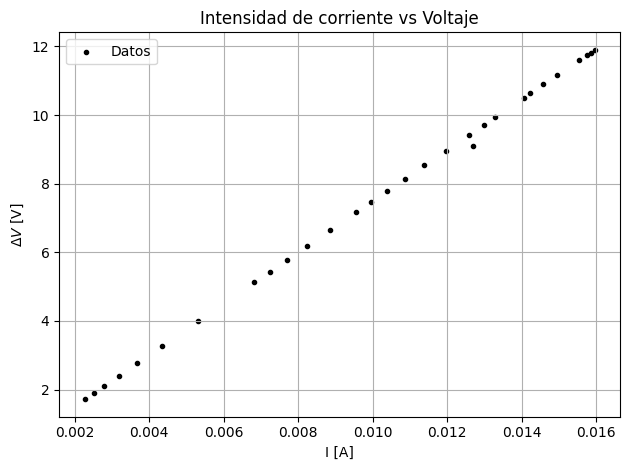

In [9]:

plt.scatter(I,V,marker=".",color="black",label="Datos")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$'f" [V]")
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.legend()
plt.tight_layout()

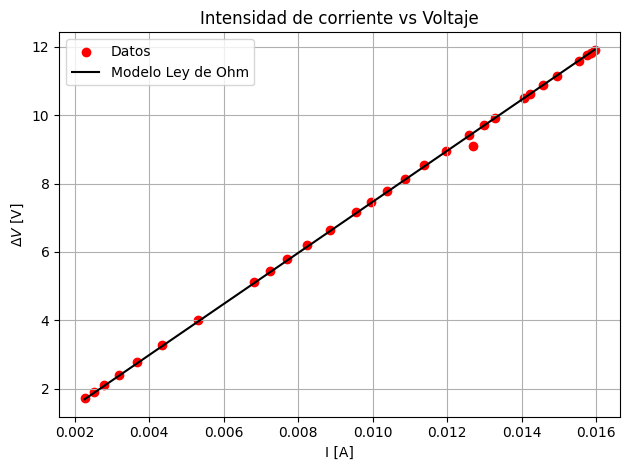

In [10]:

plt.scatter(I,V,marker="o",color="red",label="Datos")
plt.plot(I,746.33*I,color="black",label="Modelo Ley de Ohm")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$'f" [V]")
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.legend()
plt.tight_layout()

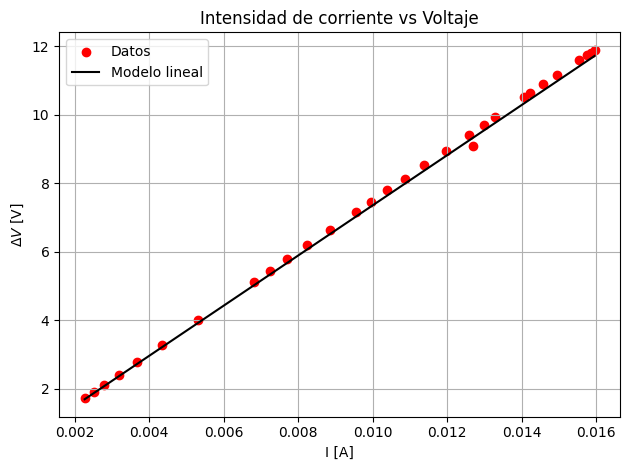

In [118]:

plt.scatter(I,V,marker="o",color="red",label="Datos")
plt.plot(I,732.54*I+0.028,color="black",label="Modelo lineal")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$'f" [V]")
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Resistencia vs χ² (R)')

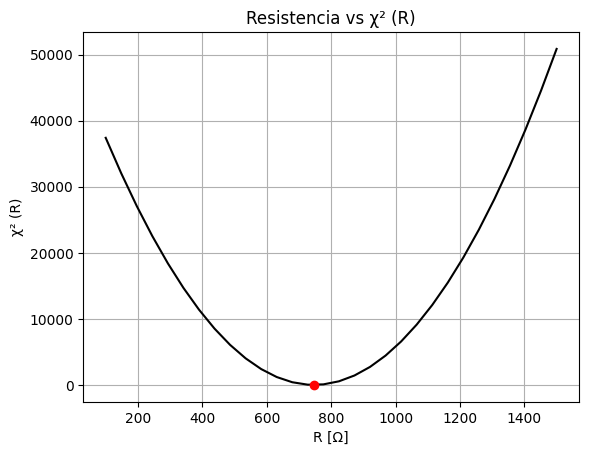

In [12]:
plt.plot(Re_v,xi2,color="black")
#plt.plot(Rv_min,0)
plt.plot(Rv_min,0, 'or')
plt.grid(True)
plt.xlabel("R [\u03A9]")
plt.ylabel("\u03C7\u00B2 (R)")
plt.title("Resistencia vs \u03C7\u00B2 (R)")

Modelo Lineal: Chi-cuadrado mínimo = 41.0646 con m = 734.4011, b = 0.3495
Modelo Logarítmico: Chi-cuadrado mínimo = 7219.2376 con m = 16.4974, b = 38.6875


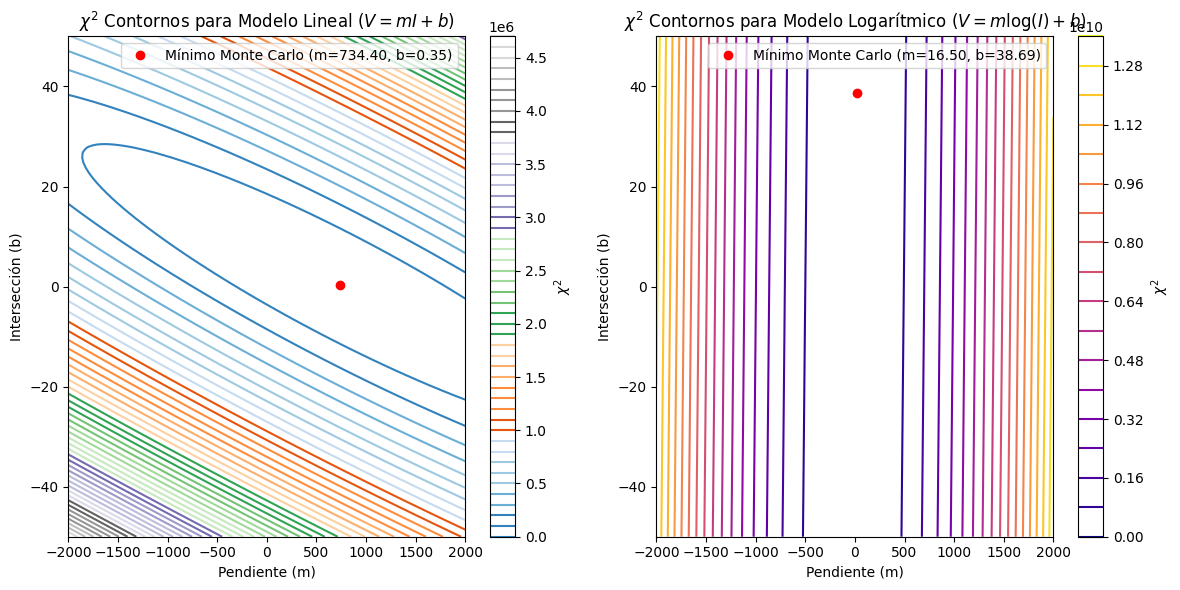

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
I = np.array([
    0.01596, 0.01586, 0.01576, 0.01554, 0.01495, 0.01459, 0.01423, 0.01407, 0.01328, 0.01299,
    0.01271, 0.01259, 0.01196, 0.01138, 0.01086, 0.01039, 0.00995, 0.00956, 0.00885, 0.00824,
    0.0077, 0.00724, 0.00682, 0.0053, 0.00435, 0.00367, 0.00318, 0.0028, 0.00251, 0.00227
])
V = np.array([
    11.9, 11.82, 11.75, 11.59, 11.16, 10.89, 10.63, 10.51, 9.93, 9.71,
    9.1, 9.42, 8.95, 8.53, 8.14, 7.79, 7.46, 7.17, 6.65, 6.19,
    5.79, 5.44, 5.13, 4, 3.28, 2.78, 2.41, 2.12, 1.91, 1.72
])
sigma_V = np.full_like(V, 0.2)  # Error estándar proporcionado

# Definir modelos
def modelo_lineal(I, m, b):
    return m * I + b

def modelo_logaritmico(I, m, b):
    return m * np.log10(I) + b ################################################3

# Función de chi-cuadrado para cada modelo
def chi_squared(modelo, I, V, sigma_V, m, b):
    return np.sum(((V - modelo(I, m, b)) / sigma_V) ** 2)

# Simulación de Monte Carlo
n_simulaciones = 10000  # Número de simulaciones de Monte Carlo
m_min, m_max = -2000, 2000  # Rango de valores para m
b_min, b_max = -50, 50  # Rango de valores para b

# Inicialización de variables para almacenar el mínimo
chi2_min_lineal = np.inf
chi2_min_logaritmico = np.inf
best_m_lineal, best_b_lineal = 0, 0
best_m_logaritmico, best_b_logaritmico = 0, 0

for _ in range(n_simulaciones):
    # Generar valores aleatorios de m y b
    m_random = np.random.uniform(m_min, m_max)
    b_random = np.random.uniform(b_min, b_max)
    
    # Calcular chi-cuadrado para cada modelo
    chi2_lineal = chi_squared(modelo_lineal, I, V, sigma_V, m_random, b_random)
    chi2_logaritmico = chi_squared(modelo_logaritmico, I, V, sigma_V, m_random, b_random)
    
    # Verificar si es el mínimo encontrado hasta ahora para el modelo lineal
    if chi2_lineal < chi2_min_lineal:
        chi2_min_lineal = chi2_lineal
        best_m_lineal, best_b_lineal = m_random, b_random

    # Verificar si es el mínimo encontrado hasta ahora para el modelo logarítmico
    if chi2_logaritmico < chi2_min_logaritmico:
        chi2_min_logaritmico = chi2_logaritmico
        best_m_logaritmico, best_b_logaritmico = m_random, b_random

# Mostrar los resultados
print(f"Modelo Lineal: Chi-cuadrado mínimo = {chi2_min_lineal:.4f} con m = {best_m_lineal:.4f}, b = {best_b_lineal:.4f}")
print(f"Modelo Logarítmico: Chi-cuadrado mínimo = {chi2_min_logaritmico:.4f} con m = {best_m_logaritmico:.4f}, b = {best_b_logaritmico:.4f}")

# Redefinir los rangos de m y b para la gráfica de contornos
m_values = np.linspace(m_min, m_max, 100)
b_values = np.linspace(b_min, b_max, 100)

# Crear una cuadrícula de m y b
M, B = np.meshgrid(m_values, b_values)

# Calcular chi-cuadrado para la cuadrícula
chi2_lineal = np.array([[chi_squared(modelo_lineal, I, V, sigma_V, m, b) for m in m_values] for b in b_values])
chi2_logaritmico = np.array([[chi_squared(modelo_logaritmico, I, V, sigma_V, m, b) for m in m_values] for b in b_values])

# Gráfica de contornos de chi-cuadrado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contour(M, B, chi2_lineal, levels=50, cmap='tab20c')
plt.plot(best_m_lineal, best_b_lineal, 'ro', label=f"Mínimo Monte Carlo (m={best_m_lineal:.2f}, b={best_b_lineal:.2f})")
plt.title(r'$\chi^2$ Contornos para Modelo Lineal ($V = mI + b$)')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección (b)')
plt.colorbar(label=r'$\chi^2$')
plt.legend()

plt.subplot(1, 2, 2)
plt.contour(M, B, chi2_logaritmico, levels=20, cmap='plasma')
plt.plot(best_m_logaritmico, best_b_logaritmico, 'ro', label=f"Mínimo Monte Carlo (m={best_m_logaritmico:.2f}, b={best_b_logaritmico:.2f})")
plt.title(r'$\chi^2$ Contornos para Modelo Logarítmico ($V = m\log(I) + b$)')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección (b)')
plt.colorbar(label=r'$\chi^2$')
plt.legend()

plt.tight_layout()
plt.show()


In [136]:
chi2logo = np.sum(((V -(5.37*np.log(I)+32.998))**2) / (0.2**2))
chi2redlogo=chi2/N

In [137]:
print(chi2logo)

463.895782495964


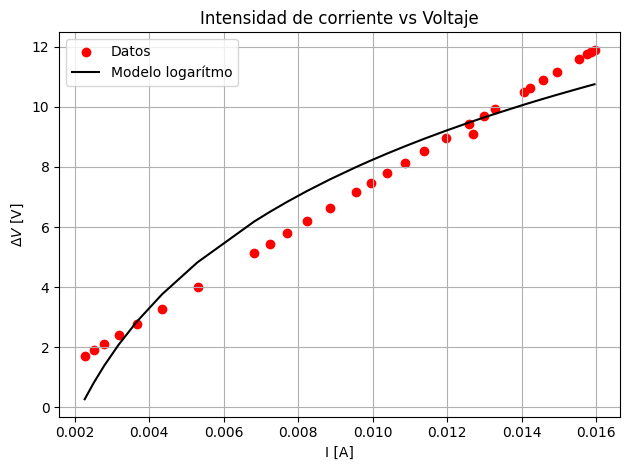

In [135]:
plt.scatter(I,V,marker="o",color="red",label="Datos")
plt.plot(I,5.3761*np.log(I)+32.998,color="black",label="Modelo logarítmo")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$'f" [V]")
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.legend()
plt.tight_layout()

In [108]:
chi2log = np.sum(((V -(I *5.3761+32.998))**2) / (0.2**2))
chi2redlog=chi2/N

In [109]:
print(chi2log)
print(chi2redlog)

499103.6098517393
16636.786995057977


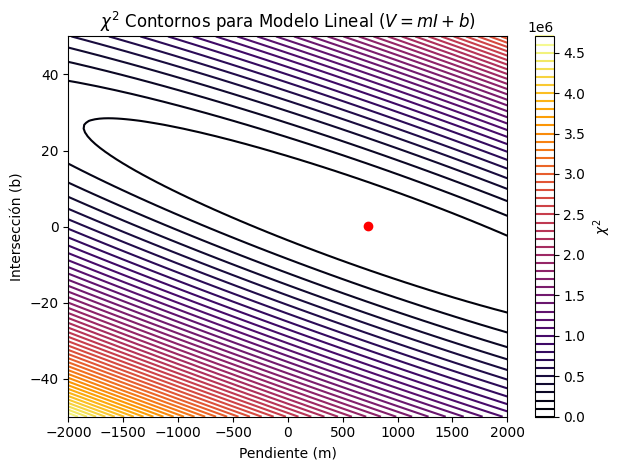

In [149]:

plt.contour(M, B, chi2_lineal, levels=50, cmap='inferno')
plt.plot(732.54, 0.28, 'ro')
plt.title(r'$\chi^2$ Contornos para Modelo Lineal ($V = mI + b$)')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección (b)')
plt.colorbar(label=r'$\chi^2$')

plt.tight_layout()
plt.show()

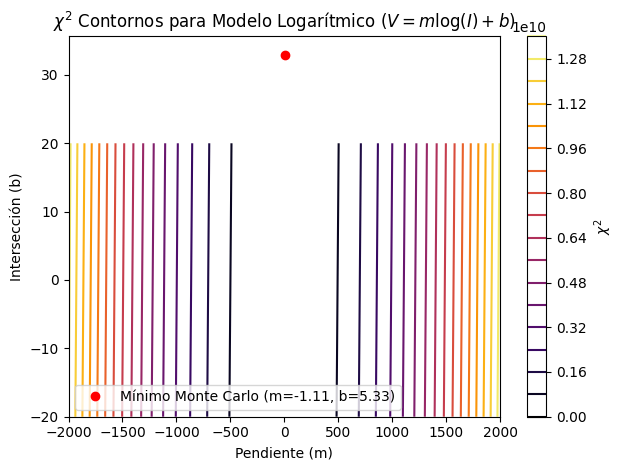

In [138]:
plt.contour(M, B, chi2_logaritmico, levels=20, cmap='inferno')
plt.plot(5.37, 32.98, 'ro', label=f"Mínimo Monte Carlo (m={best_m_logaritmico:.2f}, b={best_b_logaritmico:.2f})")
plt.title(r'$\chi^2$ Contornos para Modelo Logarítmico ($V = m\log(I) + b$)')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección (b)')
plt.colorbar(label=r'$\chi^2$')
plt.legend()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


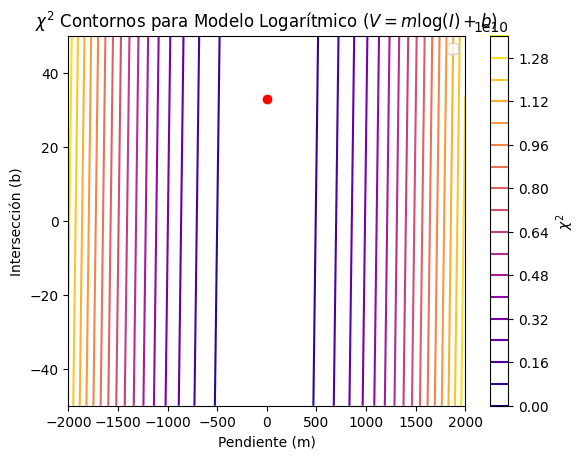

In [150]:
plt.contour(M, B, chi2_logaritmico, levels=20, cmap='plasma')
plt.plot(5.37, 32.99, 'ro')
plt.title(r'$\chi^2$ Contornos para Modelo Logarítmico ($V = m\log(I) + b$)')
plt.xlabel('Pendiente (m)')
plt.ylabel('Intersección (b)')
plt.colorbar(label=r'$\chi^2$')
plt.legend()